# Predicting Readmission Rates of Diabetic Patients: A Machine Learning Approach

**Author** : Diana Nduta Mwaura

# Overview
Poor readmission rates increases the risk of potential patient diverting to other facilities. The purpose of this project to create a model that can be used to predict whether or not a patient will be readmitted within 30 days or after 30 days after being discharged. The dataset used in the project was obtained from 130 US hospitals over a period of 10 years (1999-2000). The dataset was split into test and train sets then removing missing values, one hot encoding, ordinal encoding, standardizing and removing class imbalances were performed. Modeling was performed whereby different models such as the Logistic Regression Models, Decision Tree Classifier and the KNeighbors Classifier were created and their performance analyzed. Tweaking was done on the models by using pipelines to determine the best parameters to be used in the models. Finally, the best model emerged to be the Logistic Regression Model whose parameters were selected by the pipelines

## Business Understanding

Management of diabetes in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. This project aims at predicting how likely a patient will be readmitted after discharge based on a number of features. Stakeholders are majorly interested in reducing the readmission rates in order to preserve and allocate hospital resources more efficiently. The recommendations are meant to inform future directions which might lead to improvements in future patient safety. This information may prove valuable in the development of strategies by caregivers to reduce readmission rates and costs for the care of individuals with diabetes. 

The problem statement is:

How can diabetic patients health records help to predict patient readmission rates?

## Data Understanding
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes and 101766 instances. 

Information was extracted from the database for encounters that satisfied the following criteria.

(1) It is an inpatient encounter (a hospital admission).

(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3) The length of stay was at least 1 day and at most 14 days.

(4) Laboratory tests were performed during the encounter.

(5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization. The target column was selected to be the readmitted column and the other columns were the predictors. The data contains no missing values or duplicates.

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve,auc,accuracy_score,mean_squared_error,precision_score,f1_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import numpy as np
import warnings
warnings.filterwarnings ('ignore')

In [3]:
#Loading data
raw_data = pd.read_csv('diabetic_data.csv')
raw_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [72]:
# Displaying column type informaation
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [73]:
# Displaying the summary statistics of the data 
raw_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [74]:
# Checking for missing values in the dataset
raw_data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [75]:
# Helper function to identify duplicates in the dataset

def identify_duplicates(data):
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if (len(duplicates_set)==1):
        return 'Dataset contains no duplicates'
    else:
        no_true = 0
        for i in duplicates:
            if(val==True):
                no_true +=1
        duplicates_percentage = np.round((no_true/len(data))*100,3) 
        return f'Data contains {no_true} which accounts for {duplicates_percentage}'

In [76]:
# Identifying the duplicates in the dataset
identify_duplicates(raw_data)

'Dataset contains no duplicates'

## Data Preprocessing
Using domain knowledge a number of columns were selected from the dataset columns. The criteria for selecting the columns was based on which columns seemed more applicable to the problem statement. Data cleaning involved removing missing values that were encoded as relevant values, splitting the data into train and test sets, performing ordinal encoding on the binary columns and performing one hot encoding on the other categorical columns.

In [77]:
# Selecting the columns to be used
columns = ['encounter_id','gender', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'number_outpatient', 'number_inpatient', 'num_lab_procedures', 'num_procedures','max_glu_serum', 'A1Cresult',
           'num_medications', 'number_emergency', 'number_diagnoses','insulin', 'change', 'diabetesMed', 'readmitted']

In [78]:
# Subsetting the columns from the entire dataset
data = raw_data.loc[:,columns]
data.head()

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,max_glu_serum,A1Cresult,num_medications,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,2278392,Female,[0-10),6,25,1,1,0,0,41,0,None,None,1,0,1,No,No,No,NO
1,149190,Female,[10-20),1,1,7,3,0,0,59,0,None,None,18,0,9,Up,Ch,Yes,>30
2,64410,Female,[20-30),1,1,7,2,2,1,11,5,None,None,13,0,6,No,No,Yes,NO
3,500364,Male,[30-40),1,1,7,2,0,0,44,1,None,None,16,0,7,Up,Ch,Yes,NO
4,16680,Male,[40-50),1,1,7,1,0,0,51,0,None,None,8,0,5,Steady,Ch,Yes,NO


In [79]:
# Renaming column values to drop
data.replace("?",pd.NA, inplace=True)
data.dropna(inplace=True)

In [80]:
# Checking for unique values 
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [81]:
# Dropping the rows with invalid 
data['gender'].replace(False,pd.NA, inplace=True)
data['gender'].dropna(inplace=True)

In [82]:

data

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,max_glu_serum,A1Cresult,num_medications,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,2278392,Female,[0-10),6,25,1,1,0,0,41,0,None,None,1,0,1,No,No,No,NO
1,149190,Female,[10-20),1,1,7,3,0,0,59,0,None,None,18,0,9,Up,Ch,Yes,>30
2,64410,Female,[20-30),1,1,7,2,2,1,11,5,None,None,13,0,6,No,No,Yes,NO
3,500364,Male,[30-40),1,1,7,2,0,0,44,1,None,None,16,0,7,Up,Ch,Yes,NO
4,16680,Male,[40-50),1,1,7,1,0,0,51,0,None,None,8,0,5,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,Male,[70-80),1,3,7,3,0,0,51,0,None,>8,16,0,9,Down,Ch,Yes,>30
101762,443847782,Female,[80-90),1,4,5,5,0,1,33,3,None,None,18,0,9,Steady,No,Yes,NO
101763,443854148,Male,[70-80),1,1,7,1,1,0,53,0,None,None,9,0,13,Down,Ch,Yes,NO
101764,443857166,Female,[80-90),2,3,7,10,0,1,45,2,None,None,21,0,9,Up,Ch,Yes,NO


In [83]:
# Specifying the predictor and target columns
y = data['readmitted']
X = data.drop('readmitted',axis=1)


In [84]:
# Checking for class imbalance 
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

### Creating train and test sets

In [85]:
# Performing a train test split on the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,max_glu_serum,A1Cresult,num_medications,number_emergency,number_diagnoses,insulin,change,diabetesMed
35956,110939484,Female,[70-80),1,1,6,11,0,0,68,0,None,None,20,0,5,Steady,No,Yes
60927,170328306,Male,[50-60),1,1,1,1,0,0,20,0,None,None,7,0,8,No,No,Yes
79920,245688426,Female,[60-70),3,6,1,4,1,2,21,3,None,None,23,0,7,No,No,Yes
50078,150826224,Male,[30-40),2,1,1,12,0,1,28,0,None,None,19,0,7,No,No,Yes
44080,135993852,Female,[60-70),1,2,7,1,0,0,21,0,None,None,6,0,7,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19901,70550226,Female,[30-40),1,1,7,1,0,0,45,1,None,None,5,0,4,No,No,No
9561,41491242,Female,[60-70),1,1,7,4,0,2,58,0,None,None,10,0,9,Steady,No,Yes
47211,145247322,Male,[50-60),1,1,7,2,0,0,68,6,None,None,16,0,9,No,No,No
25232,84527880,Male,[60-70),1,1,6,6,0,0,61,2,None,None,7,0,5,No,No,No


### Ordinal Encoding Binary Columns

In [86]:
# Using ordiinal encoder for the binary column
gender_train = X_train[['gender']]
encoder_gender = OrdinalEncoder()
encoder_gender.fit(gender_train)
gender_encoded_train=encoder_gender.transform(gender_train)
gender_encoded_train = gender_encoded_train.flatten()
X_train['gender'] = gender_encoded_train

In [87]:
# Confirming the transformation
X_train

,encounter_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,max_glu_serum,A1Cresult,num_medications,number_emergency,number_diagnoses,insulin,change,diabetesMed
15992,60560244,0.0,[80-90),1,1,7,10,0,0,45,0,None,None,14,0,9,No,Ch,Yes
10606,44802312,0.0,[60-70),1,1,7,4,0,0,39,0,None,None,11,0,5,No,No,No
64779,180278112,0.0,[80-90),3,1,1,1,0,0,37,2,None,None,7,0,5,No,No,No
83257,260452620,0.0,[60-70),1,6,7,8,0,4,45,0,None,None,24,1,9,Down,Ch,Yes
4204,24202548,0.0,[60-70),1,6,7,12,0,0,51,0,None,None,12,0,7,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,31296060,1.0,[70-80),1,1,7,2,0,0,35,0,None,None,12,0,9,No,No,No
54886,159139902,1.0,[60-70),5,1,1,5,0,0,63,2,None,None,23,0,9,Up,Ch,Yes
76820,232191828,1.0,[70-80),3,3,1,3,0,0,55,1,None,None,33,0,9,Down,Ch,Yes
860,6740700,0.0,[60-70),6,25,7,12,0,0,77,2,None,None,21,0,9,Down,Ch,Yes


In [88]:
# Performing the encoding on the X test
gender_test = X_test[['gender']]
encoder_gender = OrdinalEncoder()
encoder_gender.fit(gender_test)
gender_encoded_test=encoder_gender.transform(gender_test)
gender_encoded_test = gender_encoded_test.flatten()
X_test['gender'] = gender_encoded_test

In [89]:
# Checking the transformation of the column
X_test['gender'].value_counts()

0.0    16448
1.0    14080
2.0        2
Name: gender, dtype: int64

### One Hot Encoding Categorical Columns

In [90]:
# Specifying the columns for one hot encoding
required_columns = [ 'age','insulin','change','A1Cresult','max_glu_serum','diabetesMed']

In [91]:
# Performing one hot encoding to the X train
X_train_ohe = X_train.loc[:, required_columns]

X_train_encoded_df = pd.get_dummies(X_train_ohe, drop_first=True)

X_train_encoded = X_train.drop(required_columns, axis=1)  # Drop the original columns

X_train_encoded = pd.concat([X_train_encoded, X_train_encoded_df], axis=1)  #


In [92]:
# Confirming the one hot encoding
X_train_encoded


,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,...,insulin_Steady,insulin_Up,change_No,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,diabetesMed_Yes
15992,60560244,0.0,1,1,7,10,0,0,45,0,...,0,0,0,0,1,0,0,1,0,1
10606,44802312,0.0,1,1,7,4,0,0,39,0,...,0,0,1,0,1,0,0,1,0,0
64779,180278112,0.0,3,1,1,1,0,0,37,2,...,0,0,1,0,1,0,0,1,0,0
83257,260452620,0.0,1,6,7,8,0,4,45,0,...,0,0,0,0,1,0,0,1,0,1
4204,24202548,0.0,1,6,7,12,0,0,51,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,31296060,1.0,1,1,7,2,0,0,35,0,...,0,0,1,0,1,0,0,1,0,0
54886,159139902,1.0,5,1,1,5,0,0,63,2,...,0,1,0,0,1,0,0,1,0,1
76820,232191828,1.0,3,3,1,3,0,0,55,1,...,0,0,0,0,1,0,0,1,0,1
860,6740700,0.0,6,25,7,12,0,0,77,2,...,0,0,0,0,1,0,0,1,0,1


In [93]:
# Performing one hot encoding to the X test
X_test_ohe = X_test.loc[:, required_columns]

X_test_encoded_df = pd.get_dummies(X_test_ohe, drop_first=True)

X_test = X_test.drop(required_columns, axis=1)  # Drop the original columns

X_test = pd.concat([X_test, X_test_encoded_df], axis=1)  #
X_test

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,...,insulin_Steady,insulin_Up,change_No,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,diabetesMed_Yes
35956,110939484,0.0,1,1,6,11,0,0,68,0,...,1,0,1,0,1,0,0,1,0,1
60927,170328306,1.0,1,1,1,1,0,0,20,0,...,0,0,1,0,1,0,0,1,0,1
79920,245688426,0.0,3,6,1,4,1,2,21,3,...,0,0,1,0,1,0,0,1,0,1
50078,150826224,1.0,2,1,1,12,0,1,28,0,...,0,0,1,0,1,0,0,1,0,1
44080,135993852,0.0,1,2,7,1,0,0,21,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19901,70550226,0.0,1,1,7,1,0,0,45,1,...,0,0,1,0,1,0,0,1,0,0
9561,41491242,0.0,1,1,7,4,0,2,58,0,...,1,0,1,0,1,0,0,1,0,1
47211,145247322,1.0,1,1,7,2,0,0,68,6,...,0,0,1,0,1,0,0,1,0,0
25232,84527880,1.0,1,1,6,6,0,0,61,2,...,0,0,1,0,1,0,0,1,0,0


### Standardizing the Data

In [94]:
# Performing normalization to the X tain
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_encoded.index, columns = X_train_encoded.columns)
X_train_scaled

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,...,insulin_Steady,insulin_Up,change_No,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,diabetesMed_Yes
15992,0.136410,0.0,0.000000,0.000000,0.250000,0.692308,0.0,0.000000,0.335878,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
10606,0.100907,0.0,0.000000,0.000000,0.250000,0.230769,0.0,0.000000,0.290076,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
64779,0.406141,0.0,0.285714,0.000000,0.000000,0.000000,0.0,0.000000,0.274809,0.333333,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
83257,0.586779,0.0,0.000000,0.185185,0.250000,0.538462,0.0,0.210526,0.335878,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4204,0.054494,0.0,0.000000,0.185185,0.250000,0.846154,0.0,0.000000,0.381679,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.070476,0.5,0.000000,0.000000,0.250000,0.076923,0.0,0.000000,0.259542,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
54886,0.358516,0.5,0.571429,0.000000,0.000000,0.307692,0.0,0.000000,0.473282,0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
76820,0.523106,0.5,0.285714,0.074074,0.000000,0.153846,0.0,0.000000,0.412214,0.166667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
860,0.015152,0.0,0.714286,0.888889,0.250000,0.846154,0.0,0.000000,0.580153,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [95]:
# Performing standardization to the X test
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)
X_test_scaled

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,num_lab_procedures,num_procedures,...,insulin_Steady,insulin_Up,change_No,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,diabetesMed_Yes
35956,-0.530473,-0.925163,-0.711773,-0.515938,0.059527,2.220660,-0.294551,-0.506734,1.276876,-0.788373,...,1.504724,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
60927,0.051202,1.080321,-0.711773,-0.515938,-1.166928,-1.139724,-0.294551,-0.506734,-1.185469,-0.788373,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
79920,0.789305,-0.925163,0.654877,0.432667,-1.166928,-0.131609,0.497752,1.094860,-1.134170,0.962272,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
50078,-0.139808,1.080321,-0.028448,-0.515938,-1.166928,2.556699,-0.294551,0.294063,-0.775078,-0.788373,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
44080,-0.285081,-0.925163,-0.711773,-0.326217,0.304818,-1.139724,-0.294551,-0.506734,-1.134170,-0.788373,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19901,-0.926059,-0.925163,-0.711773,-0.515938,0.304818,-1.139724,-0.294551,-0.506734,0.097002,-0.204825,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,-1.855094
9561,-1.210673,-0.925163,-0.711773,-0.515938,0.304818,-0.131609,-0.294551,1.094860,0.763888,-0.788373,...,1.504724,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,0.539056
47211,-0.194450,1.080321,-0.711773,-0.515938,0.304818,-0.803685,-0.294551,-0.506734,1.276876,2.712917,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,-1.855094
25232,-0.789157,1.080321,-0.711773,-0.515938,0.059527,0.540468,-0.294551,-0.506734,0.917784,0.378723,...,-0.664574,-0.351485,0.927849,-0.293477,0.446035,-0.222975,-0.112565,0.236101,-0.163089,-1.855094


### Dealing with Class Imbalance 

In [96]:
#Original class distribution
print('The original class distribution is \n')
print(y.value_counts())

#Instantiate the class
smote = SMOTE()

X_train_scaled, y_train = smote.fit_resample(X_train_scaled,y_train)

#Preview the synthetic sample class
print('\n')
print('Synthetic sample class distribution is \n')
print(pd.Series(y_train).value_counts())


The original class distribution is 

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


Synthetic sample class distribution is 

NO     38403
<30    38403
>30    38403
Name: readmitted, dtype: int64


# Modeling

Modeling was performed whereby different models such as the Logictic Regression Models, Decision Tree Classifier and the KNeighbors Classifier were created and their performance analyzed.
The metrics that were used to select the best model are the recall score, accuracy score and the cross validation scores.

The reasons for selecting these metrics include:

1. This project aims at focusing on recall as the main metric since prioritizing on reducing false negatives, ensures that patients who are likely to be readmitted are correctly identified by the model.A high recall implies that the model will not incorrectly predict that a patient will not be readmitted when they actually will. By maximizing the recall, we are reducing the chance of missing potentially important cases. Preventing missed readmissions is an important factor in healthcare as they indicate inadequate care.

2. The overall correctness of the model's prediction was determined by the accuracy metric. Since class imbalances were removed the accuracy scores in the models are reliable values.

3. Cross validation accuracy scores for the training and tests sets were used to indicate if the model is overfitting. Models which were not generalizable were not selected.


## Baseline Model - Logistic Regression Model

In [97]:
# Helper function to generate models
def generate_model(model,X_train,y_train):
    model_class = model
    return model_class.fit(X_train,y_train)
    

In [98]:
#Fitting a Logistic Regression Model
logreg = generate_model(LogisticRegression(penalty = 'l2',fit_intercept=False, C=1e16, solver='liblinear'),X_train_scaled,
              y_train)

In [99]:
# Helper function to predict X test
def predict(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    y_hat_test = model.predict(X_test)
    return y_hat_test

In [100]:
predict(LogisticRegression(penalty = 'l2',fit_intercept=False, C=1e16, solver='liblinear'),X_train_scaled,
              y_train,X_test_scaled)

array(['NO', 'NO', '<30', ..., 'NO', 'NO', '<30'], dtype=object)

In [101]:
# Helper function to display the metrics
def print_metrics(labels, preds,average = None):
    print("Precision Score: {}".format(precision_score(labels, preds, average=average)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=average)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average=average)))
    
print_metrics(y_test, predict(LogisticRegression(penalty='l2', fit_intercept=False, 
                                                 C=1e16, solver='liblinear'), X_train_scaled, 
                              y_train, X_test_scaled), average='macro')

Precision Score: 0.41944750909890827
Recall Score: 0.4266360801056505
Accuracy Score: 0.49606943989518504
F1 Score: 0.3724487347510532


In [44]:
# Performing cross validation
cross_val_results = cross_validate(logreg,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([3.83880472, 5.20102763, 4.7272954 , 5.51690149, 6.00556827]),
 'score_time': array([0.0329802 , 0.08197212, 0.06596446, 0.06696153, 0.04597282]),
 'test_score': array([0.44553424, 0.44423227, 0.44444927, 0.45759917, 0.46000608]),
 'train_score': array([0.45494591, 0.45363308, 0.45300379, 0.45038897, 0.44874577])}

In [45]:
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(-0.45214350310682005, -0.4503642045488771)

## Second Model - Decision Tree Model

In [46]:
# Creating a Decision Tree Classifier model
tree = generate_model(DecisionTreeClassifier(criterion = 'entropy')
                ,X_train_scaled,y_train)

In [47]:
# Obtaining the accuracy metrics
y_pred = predict(DecisionTreeClassifier(criterion = 'entropy'),X_train_scaled,
              y_train,X_test_scaled)
print_metrics(y_test, y_pred,average='macro')

Precision Score: 0.35607394715411794
Recall Score: 0.3627662734954613
Accuracy Score: 0.31693416311824435
F1 Score: 0.30450855965688867


In [48]:
# Performing a cross validation
cross_val_results = cross_validate(tree,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([2.68244433, 2.29967928, 2.57652879, 2.20673323, 2.2357204 ]),
 'score_time': array([0.03699398, 0.03696227, 0.04197335, 0.03698134, 0.07094026]),
 'test_score': array([0.40118045, 0.56796285, 0.56865723, 0.59330787, 0.5777527 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [49]:
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(-1.0, -0.5417722224867781)

## Third Model - KNN

In [54]:
knn = generate_model(KNeighborsClassifier(n_neighbors=17)
                ,X_train_scaled,y_train)

In [55]:
# Obtaining the accuracy metrics
y_pred = predict(KNeighborsClassifier(n_neighbors=17),X_train_scaled,
              y_train,X_test_scaled)
print_metrics(y_test, y_pred,average='macro')

Precision Score: 0.3925637699235797
Recall Score: 0.4019464950740603
Accuracy Score: 0.45253848673435965
F1 Score: 0.3870423728415883


In [56]:
# Performing cross validation
cross_val_results = cross_validate(knn,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([0.15891719, 0.1869173 , 0.42089128, 0.17091751, 0.18392324]),
 'score_time': array([68.91773701, 68.49591589, 72.23117757, 63.02866864, 70.28038335]),
 'test_score': array([0.50269074, 0.53194167, 0.5305529 , 0.55494315, 0.56664207]),
 'train_score': array([0.60738659, 0.60150596, 0.60344809, 0.59152408, 0.5854201 ])}

In [45]:
# Obtaining the mean of the cross validation scores
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(0.3202131938857603, 0.3757240547063556)

## Improving Model Performance Using Pipelines 
### Logistic Regression

In [57]:

# Define the pipeline steps
steps = [
    ('logreg', LogisticRegression())]


param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],  # Regularization parameter
    'logreg__solver': ['liblinear', 'saga']  # Solver algorithm
}


pipeline = Pipeline(steps)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

grid_search.score(X_test,y_test)

0.5391745823779889

In [58]:
# Obtaining the best parameters
best_params = grid_search.best_params_
print(best_params)

{'logreg__C': 10.0, 'logreg__solver': 'saga'}


## Fourth Model - Improved Logistic Regression Model

In [61]:
#Fitting a Logistic Regression Model
logreg = generate_model(LogisticRegression(penalty = 'l2',
                                           fit_intercept=False, C=10, solver='saga'),X_train_scaled,
                                            y_train)

In [64]:
print_metrics(y_test, predict(LogisticRegression(penalty = 'l2',
              fit_intercept=False, C=10, solver='saga'),X_train_scaled,
              y_train,X_test_scaled),average='macro')

Precision Score: 0.4233694992343254
Recall Score: 0.4268829236483637
Accuracy Score: 0.5033082214215526
F1 Score: 0.3744506654744173


In [88]:
cross_val_results = cross_validate(logreg,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([4.03380275, 4.44845152, 4.33352041, 4.49242926, 5.10607791]),
 'score_time': array([0.0489707 , 0.04297566, 0.03498006, 0.04197431, 0.04497194]),
 'test_score': array([0.44536065, 0.44366808, 0.44444927, 0.45803316, 0.46013628]),
 'train_score': array([0.45485911, 0.45373073, 0.45279764, 0.45030217, 0.44833348])}

In [89]:
# Obtaining the mean of the cross validation scores
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(-0.4520046256610761, -0.4503294864706085)

## Pipeline - Decision Tree Classifier

In [65]:
# Generating a pipeline
pipe = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=123))
])

param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [1, 2, 5, 10],
    'tree__min_samples_split': [ 5, 10, 20]
}

tree = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3)
tree.fit(X_train_scaled, y_train)
tree.score(X_test, y_test)

0.4305928594824763

In [66]:
# Obtaining the best parameters
best_params = tree.best_params_
print(best_params)

{'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__min_samples_split': 5}


## Fifth Model - Hyperparameter Tuned Decision Tree Classifier Model

In [67]:
# Implementing the best parameters
tree = generate_model(DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, criterion = 'gini')
                ,X_train_scaled,y_train)

In [69]:
# Obtaining the accuracy metrics
y_pred = predict(DecisionTreeClassifier(max_depth = 10, min_samples_split = 10,criterion = 'entropy'),X_train_scaled,
              y_train,X_test_scaled)
print_metrics(y_test, y_pred,average='macro')

Precision Score: 0.3727073002673114
Recall Score: 0.4067674894236568
Accuracy Score: 0.3795610874549623
F1 Score: 0.33060281720701584


In [70]:
# Performing a cross validation
cross_val_results = cross_validate(tree,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([1.02331877, 1.23128057, 0.97149062, 0.96948695, 0.91951418]),
 'score_time': array([0.03198123, 0.03198218, 0.03100276, 0.03198218, 0.03595948]),
 'test_score': array([0.41450395, 0.61986807, 0.63054422, 0.59773457, 0.5633002 ]),
 'train_score': array([0.65854373, 0.60276455, 0.60329619, 0.61010991, 0.61687354])}

In [71]:
# Mean of the cross validation scores
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(-0.6183175824893177, -0.5651902031091398)

## Pipelines - Random Forest Classifier

In [72]:
pipe = Pipeline([
    
    ('rf', RandomForestClassifier(random_state=123))
])

param_grid = {
    'rf__max_depth': [4, 5, 6], 
    'rf__min_samples_split': [2, 5, 10], 
    'rf__min_samples_leaf': [1, 3, 5]
}

tree = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3)
tree.fit(X_train_scaled, y_train)
accuracy = tree.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.47893874877169995


In [73]:
# Obtaining the best parameters
best_params = tree.best_params_
print(best_params)

{'rf__max_depth': 6, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2}


## Sixth Model - Random Forest Classifier

In [74]:
# Implementing the best parameters
rtc = generate_model(RandomForestClassifier(max_depth = 6, min_samples_leaf=1,min_samples_split=2)
                ,X_train_scaled,y_train)

In [78]:
# Obtaining the accuracy metrics
y_pred = predict(RandomForestClassifier(max_depth = 6, min_samples_leaf=1,min_samples_split=2),X_train_scaled,
              y_train,X_test_scaled)
print_metrics(y_test, y_pred,average='macro')

Precision Score: 0.41660935773655544
Recall Score: 0.39283050847440965
Accuracy Score: 0.5478218146085817
F1 Score: 0.37876800374571395


In [79]:
# Performing a cross validation
cross_val_results = cross_validate(rtc,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([7.80385947, 7.67479038, 7.99561191, 7.05613112, 6.82025862]),
 'score_time': array([0.28681827, 0.2928381 , 0.29883361, 0.29285526, 0.28784108]),
 'test_score': array([0.43498828, 0.59070393, 0.58823019, 0.55936985, 0.54450762]),
 'train_score': array([0.58399427, 0.5479076 , 0.54298176, 0.55341934, 0.5590118 ])}

In [80]:
# Mean of the cross validation scores
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

(-0.5574629552620689, -0.5435599731587263)

## Pipelines - K Neighbors Classifier

In [81]:
pipe = Pipeline([
 
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_scaled, y_train)

accuracy = grid_search.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.5391745823779889


In [82]:
# Obtaining the best parameters
best_params = grid_search.best_params_
print(best_params)

{'knn__n_neighbors': 3, 'knn__weights': 'distance'}


## Seventh Model - Improved KNN Model

In [83]:
# Implementing the best parameters
knn = generate_model(KNeighborsClassifier(n_neighbors=3,weights='distance')
                ,X_train_scaled,y_train)

In [85]:
# Obtaining the accuracy metrics
y_pred = predict(KNeighborsClassifier(n_neighbors=3,weights='distance'),X_train_scaled,
              y_train,X_test_scaled)
print_metrics(y_test, y_pred,average='macro')

Precision Score: 0.3821895582551627
Recall Score: 0.38599475625149965
Accuracy Score: 0.4660989190959712
F1 Score: 0.3822810744677687


In [87]:
# Performing a cross validation
cross_val_results = cross_validate(knn,X_train_scaled,y_train,
                                   scoring = 'accuracy',return_train_score=True)
cross_val_results

{'fit_time': array([0.15791154, 0.17689824, 0.19289231, 0.20188284, 0.17490935]),
 'score_time': array([60.16665387, 48.7810967 , 49.88146544, 50.2942276 , 50.30121875]),
 'test_score': array([0.67780575, 0.68153806, 0.68974047, 0.74654978, 0.78603359]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# Mean of the cross validation scores
train_avg = -cross_val_results['train_score'].mean()
test_avg = -cross_val_results['test_score'].mean()
train_avg,test_avg

# Evaluation


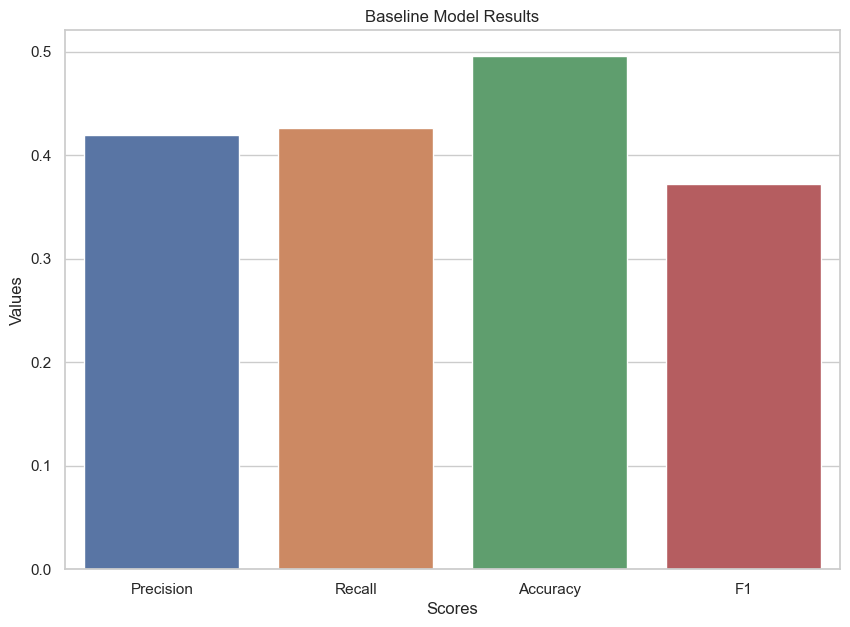

In [103]:
# First Model Results

df = {'Scores':['Precision','Recall','Accuracy','F1'],
       'Values':[ 0.41944750909890827,0.4266360801056505,0.49606943989518504,0.3724487347510532]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('Baseline Model Results')
sns.barplot(x='Scores',y='Values',data=df)
plt.show()

### Interpretation

The baseline model has an accuracy of about 0.4962 in terms of making correct predictions about whether or not a patient will be readmitted within 30 days. Since the cost of false negatives is high in this business problem the recall score is an important parameter to consider. The recall score is of about 0.4264 . The precision score is
of about 0.4201. An F1 score of about 0.371 is somewhat low. From the results, the model would not be appropriate for predicting whether a patient would or would not be readmitted in 30 days.

From cross validation accuracy scores the model is able to generalize well since there is no overfitting in the training set.

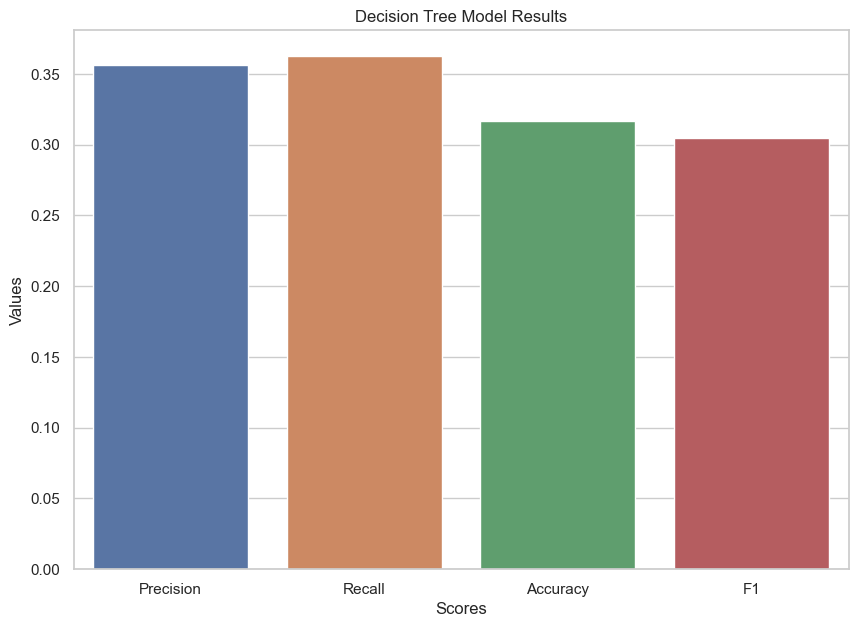

In [104]:
df = {'Scores':['Precision','Recall','Accuracy','F1'],
       'Values':[ 0.3560739471541179,0.3627662734954613,0.31693416311824435,0.30450855965688867]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('Decision Tree Model Results')
sns.barplot(x='Scores',y='Values',data=df)
plt.show()

## Interpretation

The second model has a very low accuracy of about 0.316 which is lower than the baseline model. The recall score of about 0.362 is very low therefore the model is not able to evaluate for the false negatives effectively. The precision score of about 0.356 is low. An F1 score of about 0.30 is very low compared to the baseline model. From the results, the model would not be appropriate for predicting whether a patient would or would not be readmitted in 30 days. From cross validation scores the model is not able to generalize well since there is overfitting in the training set.

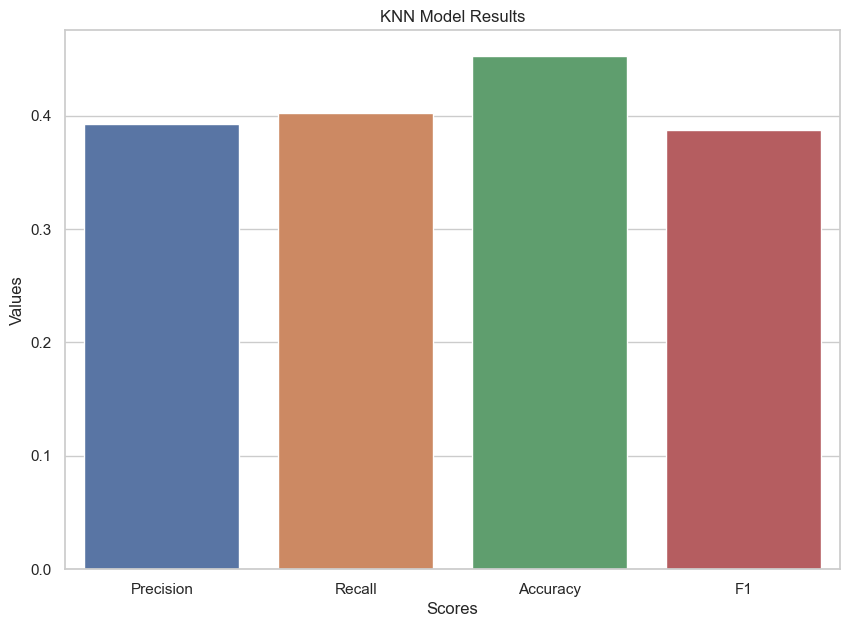

In [105]:
df = {'Scores':['Precision','Recall','Accuracy','F1'],
       'Values':[ 0.392563769923579,0.4019464950740603,0.45253848673435965,0.3870423728415883]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('KNN Model Results')
sns.barplot(x='Scores',y='Values',data=df)
plt.show()

## Interpretation

The third model has a very low accuracy of about 0.452 which is lower than the first but better than second model. The recall score of about 0.401 is the lower than the first but better than the second model. The precision score of about 0.3925 is higher compared to the second model. An F1 score of about 0.387 is the  lower compared to the baseline but better than the second model. From the results, the model would not be appropriate for predicting whether a patient would or would not be readmitted in 30 days. From cross validation scores the model is able to generalize well since there is no overfitting in the training set.

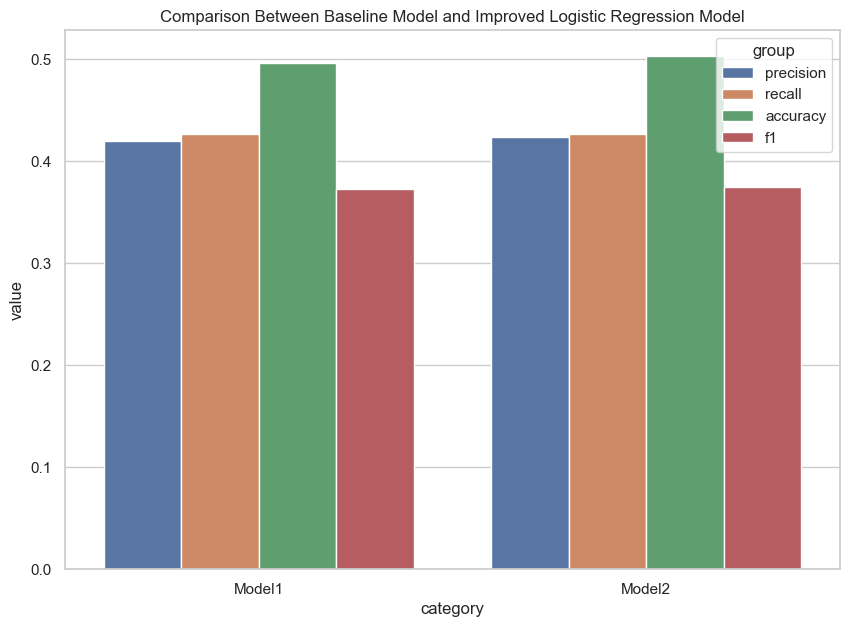

In [115]:
df = {'category':['Model1','Model1','Model1','Model1','Model2','Model2','Model2','Model2'],
       'group':['precision','recall','accuracy','f1','precision','recall','accuracy','f1'],
        'value':[0.41944750909890827,0.4266360801056505,0.49606943989518504,
                 0.3724487347510532, 0.4233694992343254,0.4268829236483637,0.5033082214215526,0.3744506654744173]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('Comparison Between Baseline Model and Improved Logistic Regression Model')
sns.barplot(x='category',y='value',hue='group',data=df)
plt.show()

## Interpretation
Model 2 represents the linear regression model after the application of pipelines and Model 1 is the baseline model. The accuracy of Model 2 is higher than that of Model 1. The recall of both models is almost the same. The precision and f1 score in Model 2 are higher than those of Model 1

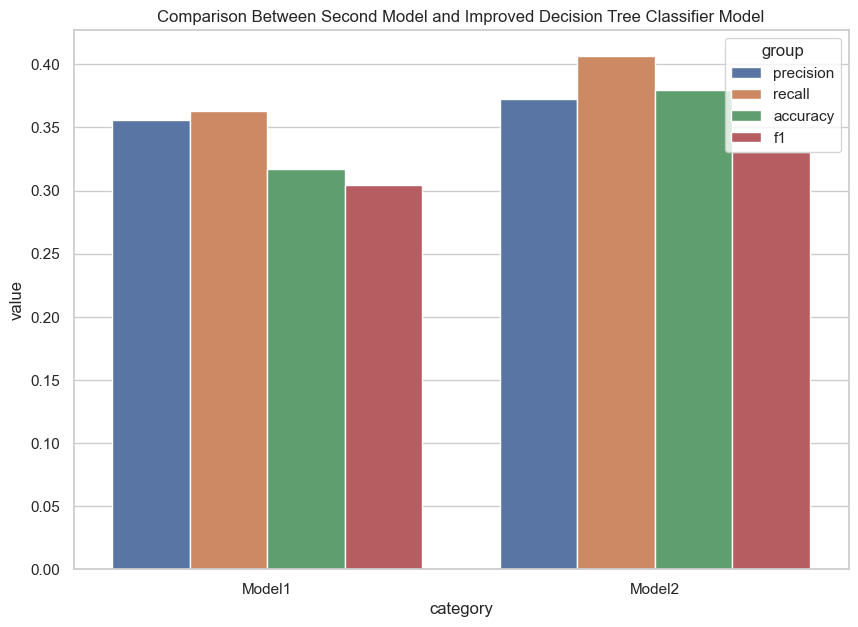

In [117]:
df = {'category':['Model1','Model1','Model1','Model1','Model2','Model2','Model2','Model2'],
       'group':['precision','recall','accuracy','f1','precision','recall','accuracy','f1'],
        'value':[0.3560739471541179,0.3627662734954613,0.31693416311824435,0.30450855965688867,
                 0.372707300267311,0.4067674894236568,0.3795610874549623,0.33060281720701584]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.title('Comparison Between Second Model and Improved Decision Tree Classifier Model')
sns.barplot(x='category',y='value',hue='group',data=df)
plt.show()

## Interpretation
Model 1 represents the second model and the Model 2 represents the hyperparameter tuned Decision Tree Classifier Model. The second model has higher scoring metrics but it is not generalizable according to the cross validation scores.

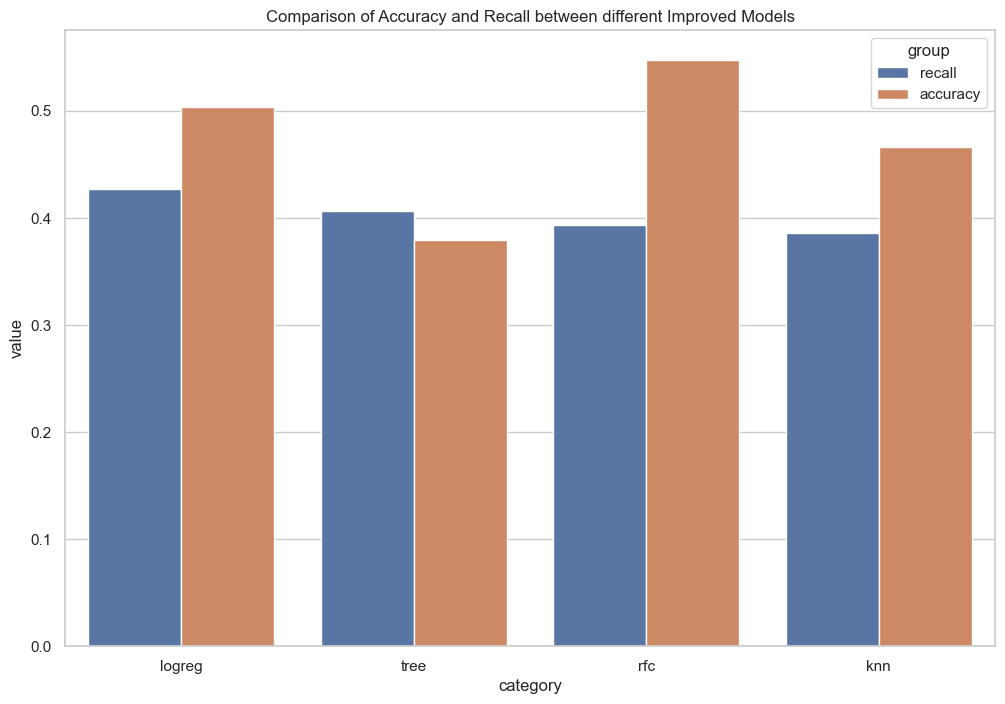

<Figure size 640x480 with 0 Axes>

In [8]:
df = {'category':['logreg','logreg','tree','tree','rfc','rfc','knn','knn'],
       'group':['recall','accuracy','recall','accuracy','recall','accuracy','recall','accuracy'],
        'value':[0.4268829236483637,0.5033082214215526,0.4067674894236568,0.3795610874549623,
                 0.39283050847440965,0.5478218146085817,0.38599475625149965,0.4660989190959712]}

df = pd.DataFrame(df)

sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
plt.title('Comparison of Accuracy and Recall between different Improved Models')
sns.barplot(x='category',y='value',hue='group',data=df)
plt.show()
plt.savefig('Images/general_performance')

From the above analysis the best model which can predict whether or not a patient will be readmitted before or after 30 days following discharge is the Logistic Regression Classifier model generated using pipelines. The reason for this is because it has the highest recall value and a pretty high accuracy as well compared to the other models.
With regards to computational complexity the KNeighbors Classifier and the Random Forest Classifier took the most time to be processed especially after incorporating pipelines. 

The Logistic Regression Classifier Model had the following results:

a. Recall Score            0.4268829236483637

b. Accuracy Score          0.5033082214215526

c. Cross Validation Score   (-0.4520046256610761, -0.4503294864706085)

The Logistic Regression Classifier was selected as the best model because it had the best overall metric scores and its computational complexity was low

# Conclusion

While carrying out the above analysis limitations were encountered; 
1) The dataset was large therefore it was prone to noise which ultimately affected the performance of the models and the dataset has a nonrandomized study design. 

2) The dataset lacked some other important variables such as socioeconomic status and availability of healthcare resources which have an impact on the readmission rates.

3)	While the model may accurately predict readmission rates, it may not provide clear insights into the underlying causes or actionable interventions for reducing readmissions.

The following are recommendations given to healthcare institutions:

a. Utilize the Logistic Regression Classifier as a toll to identify patients at a high risk of readmission. Prioritize these patients for personalized care, proactive follow-up and intensive monitoring.

b. Leverage insights from the model to inform decisions concerned with resource allocation, care coordination and ensure that appropriate healthcare services are offered to patients in time to reduce readmissions

c. Recalibrate the model as often as required to align with changing patient demographics, treatment guidelines and healthcare pratices.
